# Визуализация датасета для классификации

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

## Загрузка и подготовка данных

In [3]:
path_to_file = "..\datasets\classification\occupancy_detection_test_1.txt"
test_df_1 = pd.read_table(path_to_file, sep=',')

path_to_file = "..\datasets\classification\occupancy_detection_test_2.txt"
test_df_2 = pd.read_table(path_to_file, sep=',')

path_to_file = "..\datasets\classification\occupancy_detection_training.txt"
training_df = pd.read_table(path_to_file, sep=',')

occupancy_df = pd.concat([test_df_1, training_df, test_df_2], axis=0)

In [4]:
occupancy_df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
9748,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
9749,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
9750,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
9751,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [5]:
occupancy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20560 entries, 140 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ MB


## Визуализация

In [8]:
cols = ['Temperature', 'Humidity', 'Light', 'CO2', 'Occupancy']
sns.pairplot(occupancy_df[cols].sample(frac=1).iloc[:1000])

По данным графикам можно сделать вывод, что в признаке *Light* присутствуют выбросы, а в признаке *CO2* -- тяжёлый хвост.  
Признаки *Temperature* и *Humidity* имеют близкое к нормальному распределение.

Рассмотрим *Temperature* и *Humidity* признаки подробнее

c:\users\oleg-\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\oleg-\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity', ylabel='Density'>

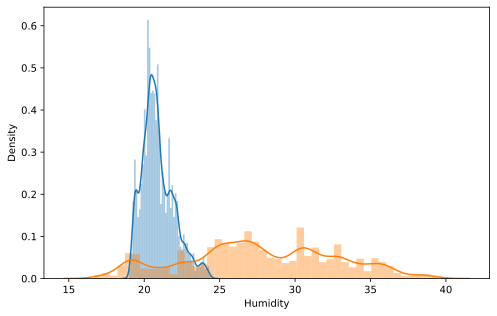

In [13]:
sns.distplot(occupancy_df.Temperature)
sns.distplot(occupancy_df.Humidity)

По данным графиками можно сделать вывод, что распределение признака *Temperature* близко к **нормальному**, а *Humidity* -- к **равномерному**

Посмотрим на "ящики с усами" для признака *CO2*

<AxesSubplot:xlabel='CO2', ylabel='Occupancy'>

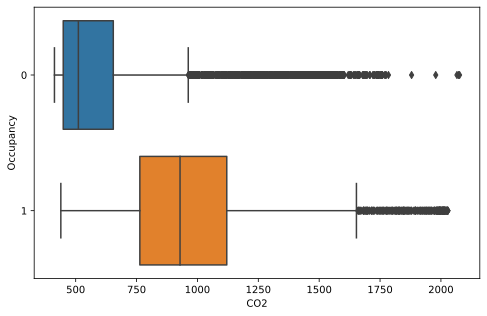

In [18]:
feature = 'CO2'
sns.boxplot(y='Occupancy', x=feature, data=occupancy_df[[feature, 'Occupancy']], orient='h')

Видим, непосредственно, распределение этого признака относительно целевой переменной. Медиана для *Occupancy = 0* примерно равна **500**, для *Occupancy = 1* -- **900**   
Данный вид визуализации корректно использовать для категориального признака, однако в датасете такого не присутствует. Однако целевая переменная может подойти для этого